# <span style="color:Brown"> Introduction

# <span style="color:Green"> ℝ𝔸ℙ𝕀𝔻𝕊 - 𝕋ℝ𝕖ℕ𝔻𝕊 ℕ𝕖𝕦𝕣𝕠𝕚𝕞𝕒𝕘𝕚𝕟𝕘 ❤
    

   
Images of the human brain, in form and function, seem to be everywhere these days - on television, in glossy magazines, and on internet blogs worldwide. This is due, in many respects, to the incredible amount of information these images present and the sheer number of brain imaging research studies being performed to spy on the brain in action or at rest, to examine how it is built and wired, and what happens when things go wrong. Indeed, neuroimagers routinely collect more study data in a few days than was collected in over an entire year just a decade ago. These data are a rich source of information on detailed brain anatomy, the subtle variations in brain activity in response to cognitive stimuli, and complex patterns of inter-regional communication. Taken individually, these various data types would have once formed the basis for entire research programs. Now, with interests not only in multi-modal neuroimaging but the inclusion of co-occurring biological and clinical variable collection requiring linkage between geographically distributed researchers, neuroscience programs are rapidly becoming the brain-focused versions of projects more akin to those involving particle physics. The methods by which these data are obtained are themselves contributing to this growth, involving finer spatial and temporal resolution as MR physicists push the limits of what is possible and as brain scientists then rush to meet those limits. It is safe to say that human neuroimaging is now, officially, a “big data” science.

Such examples of large-data, their promise and challenges, have not gone unnoticed. In the US, The National Science Foundation, the National Institutes of Health, the Defense Department, the Energy Department, Homeland Security Department as well as the U.S. Geological Survey have all made commitments toward “big data” programs. The Obama Administration itself has even gotten in on the act. In response to recommendations from the President’s Council of Advisors on Science and Technology, the White House sponsored a meeting bringing together a cross-agency committee to lay out specific actions agencies should take to coordinate and expand the government’s investment in “big data”, totaling $200 million in support (see http://www.whitehouse.gov/sites/default/files/microsites/ostp/big_data_fact_sheet_final.pdf). Among the examples of “big data” featured at the meeting was – no surprise - human neuroimaging. Additionally, the recent anouncement of the Brain Research through Advancing Innovative Neurotechnologies (BRAIN) Initiative (http://nih.gov/science/brain/index.htm) forms part of a new Presidential focus aimed at revolutionizing understanding of the human brain. Initiatives surrounding large-scale brain mapping are also underway in Europe (http://www.humanbrainproject.eu/; Frisoni 2010) and examples of large-scale brain data sets have been on full display at recent annual meetings of the Organization for Human Brain Mapping (OHBM; http://www.humanbrainmapping.org) in Beijing, China in 2012 and Seattle, Washington in June 2013.

However, as the richness of brain data sets continues to grow and the push to place it in accessible repositories mounts, there are many issues to be considered on how to handle the data, move it from place to place, how to store it, analyze it, and share it.

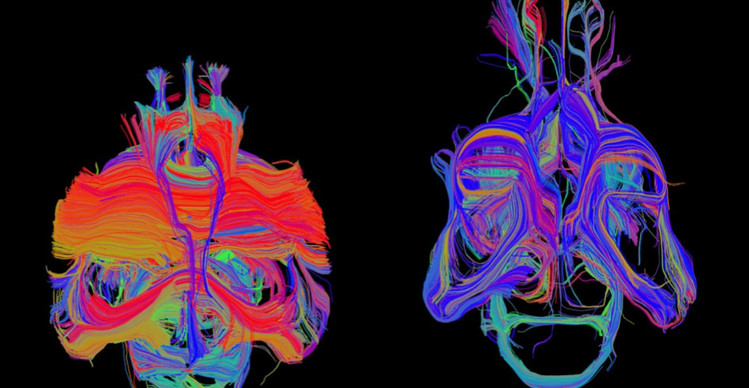

## Results

After doing an offline sweep of blending weights, the final weights show that for the best local CV, the BaggingRegressor was hardly used for the "age" target. However, the BaggingRegressor provided more benefits for the domain variables. In particular for "domain1_var2" and "domain2_var2" the BaggingRegressor almost completely replaces the basic Ridge regression method.

In terms of local CV, the result is almost identical to Bojan's notebook referenced above. On the leaderboard, adding the BaggingRegressor into the ensemble scores 0.1593, an improvement over Bojan's 0.1595. So the local CV to LB delta is successfully reduced, albeit by a little.

I find it particularly interesting that only considering small subsets of the features, the BaggingRegressor is competitive for the domain variables but not at all for age.


## <span style="color:Blue"> Please upvote this kernel if you like this notebook  ❣

**References :**

* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3983169/
* https://www.kaggle.com/aerdem4/rapids-svm-on-trends-neuroimaging
* https://www.kaggle.com/aaroha33/trends-neuroimaging-easy-notebook
* https://www.kaggle.com/andypenrose/baggingregressor-rapids-ensemble
* https://www.kaggle.com/tunguz/rapids-ensemble-for-trends-neuroimaging
* https://www.kaggle.com/saife245/neuroimaging-in-depth-understanding-eda-model


#### <span style="color:Green"> Topic to know in more depth provided with Link :

* Convolutional Neural Networks with Intermediate Loss for 3D Super-Resolution of CT and MRI Scans: [click here](https://arxiv.org/pdf/2001.01330)
* Multi-Resolution 3D CNN for MRI Brain Tumor Segmentation and Survival Prediction: [click here](https://arxiv.org/abs/1911.08388)
* Automatic Post-Stroke Lesion Segmentation on MR Images using 3D Residual Convolutional Neural Network: [click here](https://arxiv.org/pdf/1911.11209)
* You can also check out the previuos competition occur on kaggle regard to this. [click here](https://www.kaggle.com/c/mlsp-2014-mri/overview)
* You can plot brain visualization using nilearn: [click here](https://nilearn.github.io/plotting/index.html)
* Check out the various library in python for visulization of Brain MRI.[click here](https://www.kaggle.com/c/trends-assessment-prediction/discussion/148175)
* Thanks to soham for their great kernal help and giving Idea of visualization. [click here](https://www.kaggle.com/soham1024/visualization-using-nilearn)



# Load the data

In [ ]:
# Install Rapids for faster SVM on GPUs

import sys
!cp ../input/rapids/rapids.0.13.0 /opt/conda/envs/rapids.tar.gz
!cd /opt/conda/envs/ && tar -xzvf rapids.tar.gz > /dev/null
sys.path = ["/opt/conda/envs/rapids/lib/python3.6/site-packages"] + sys.path
sys.path = ["/opt/conda/envs/rapids/lib/python3.6"] + sys.path
sys.path = ["/opt/conda/envs/rapids/lib"] + sys.path
!cp /opt/conda/envs/rapids/lib/libxgboost.so /opt/conda/lib/

In [ ]:
import os
import h5py
import random
import numpy as np
import pandas as pd
import cudf
import cupy as cp
import warnings
from cuml.neighbors import KNeighborsRegressor
from cuml import SVR
from cuml.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingRegressor

def metric(y_true, y_pred):
    return np.mean(np.sum(np.abs(y_true - y_pred), axis=0)/np.sum(y_true, axis=0))

In [ ]:
fnc_df = cudf.read_csv("../input/trends-assessment-prediction/fnc.csv")
loading_df = cudf.read_csv("../input/trends-assessment-prediction/loading.csv")

fnc_features, loading_features = list(fnc_df.columns[1:]), list(loading_df.columns[1:])
df = fnc_df.merge(loading_df, on="Id")


labels_df = cudf.read_csv("../input/trends-assessment-prediction/train_scores.csv")
labels_df["is_train"] = True

df = df.merge(labels_df, on="Id", how="left")

test_df = df[df["is_train"] != True].copy()
df = df[df["is_train"] == True].copy()

In [ ]:
# Giving less importance to FNC features since they are easier to overfit due to high dimensionality.
FNC_SCALE = 1/600

df[fnc_features] *= FNC_SCALE
test_df[fnc_features] *= FNC_SCALE

# <span style="color:DarkBlue"> Glass brain visualization
Glass Brain is a tool that maps the electrical activity of your brain in realtime.The anatomically realistic 3D brain will show realtime data from electroencephalographic (EEG) signals taken from a specially-designed EEG cap.This data is mapped to the source of that electrical activity, i.e. the specific part of the brain. The underlying brain model is generated through MRI scans so that the EEG data is accurately mapped to an individual's brain model.

Different colours are given to the different signal frequency bands to create a beautiful interactive artwork that seems to crackle with energy, showing how information is transferred (or at least estimated to do so) between different regions of the brain.
    
#  <span style='color:Red'> Brain Image Visualization Library

In [ ]:
import nilearn as nl
import nibabel as nib
from nilearn import image
from nilearn import plotting
from nilearn import datasets
from nilearn import surface
import nilearn.plotting as nlplt

In [ ]:
fmri_mask = '../input/trends-assessment-prediction/fMRI_mask.nii'

In [ ]:
smri = 'ch2better.nii'
mask_img = nl.image.load_img(fmri_mask)

def load_subject(filename, mask_img):
    subject_data = None
    with h5py.File(filename, 'r') as f:
        subject_data = f['SM_feature'][()]
    # It's necessary to reorient the axes, since h5py flips axis order
    subject_data = np.moveaxis(subject_data, [0,1,2,3], [3,2,1,0])
    subject_img = nl.image.new_img_like(mask_img, subject_data, affine=mask_img.affine, copy_header=True)

    return subject_img


files = random.choices(os.listdir('../input/trends-assessment-prediction/fMRI_train/'), k = 3)
for file in files:
    subject = os.path.join('../input/trends-assessment-prediction/fMRI_train/', file)
    subject_img = load_subject(subject, mask_img)
    print("Image shape is %s" % (str(subject_img.shape)))
    num_components = subject_img.shape[-1]
    print("Detected {num_components} spatial maps".format(num_components=num_components))
    rsn = subject_img
    #convert to 3d image
    first_rsn = image.index_img(rsn, 0)
    print(first_rsn.shape)     
    plotting.plot_glass_brain(first_rsn,display_mode='lyrz')
    print("-"*50)

# <span style='color:DarkOrange'> 3D Plots of statistical maps 

In [ ]:
motor_images = datasets.fetch_neurovault_motor_task()
stat_img = motor_images.images[0]
view = plotting.view_img_on_surf(stat_img, threshold='90%')
view.open_in_browser()
view

# <span style ='color :#7F7D15 '> BaggingRegressor + RAPIDS Ensemble

In [ ]:
%%time

# To suppress the "Expected column ('F') major order, but got the opposite." warnings from cudf. It should be fixed properly,
# although as the only impact is additional memory usage, I'll supress it for now.
warnings.filterwarnings("ignore", message="Expected column")

# Take a copy of the main dataframe, to report on per-target scores for each model.
# TODO Copy less to make this more efficient.
df_model1 = df.copy()
df_model2 = df.copy()
df_model3 = df.copy()

NUM_FOLDS = 7
kf = KFold(n_splits=NUM_FOLDS, shuffle=True, random_state=0)

features = loading_features + fnc_features

# Blending weights between the three models are specified separately for the 5 targets. 
#                                 SVR,  Ridge, BaggingRegressor
blend_weights = {"age":          [0.4,  0.55,  0.05],
                 "domain1_var1": [0.55, 0.15,  0.3],
                 "domain1_var2": [0.45, 0.0,   0.55],
                 "domain2_var1": [0.55, 0.15,  0.3],
                 "domain2_var2": [0.5,  0.05,  0.45]}

overall_score = 0
for target, c, w in [("age", 60, 0.3), ("domain1_var1", 12, 0.175), ("domain1_var2", 8, 0.175), ("domain2_var1", 9, 0.175), ("domain2_var2", 12, 0.175)]:    
    y_oof = np.zeros(df.shape[0])
    y_oof_model_1 = np.zeros(df.shape[0])
    y_oof_model_2 = np.zeros(df.shape[0])
    y_oof_model_3 = np.zeros(df.shape[0])
    y_test = np.zeros((test_df.shape[0], NUM_FOLDS))
    
    for f, (train_ind, val_ind) in enumerate(kf.split(df, df)):
        train_df, val_df = df.iloc[train_ind], df.iloc[val_ind]
        train_df = train_df[train_df[target].notnull()]

        model_1 = SVR(C=c, cache_size=3000.0)
        model_1.fit(train_df[features].values, train_df[target].values)
        model_2 = Ridge(alpha = 0.0001)
        model_2.fit(train_df[features].values, train_df[target].values)
        
        ### The BaggingRegressor, using the Ridge regression method as a base, is added here. The BaggingRegressor
        # is from sklearn, not RAPIDS, so dataframes need converting to Pandas.
        model_3 = BaggingRegressor(Ridge(alpha = 0.0001), n_estimators=30, random_state=42, max_samples=0.3, max_features=0.3)
        model_3.fit(train_df.to_pandas()[features].values, train_df.to_pandas()[target].values)

        val_pred_1 = model_1.predict(val_df[features])
        val_pred_2 = model_2.predict(val_df[features])
        val_pred_3 = model_3.predict(val_df.to_pandas()[features])
        val_pred_3 = cudf.from_pandas(pd.Series(val_pred_3))
        
        test_pred_1 = model_1.predict(test_df[features])
        test_pred_2 = model_2.predict(test_df[features])
        test_pred_3 = model_3.predict(test_df.to_pandas()[features])
        test_pred_3 = cudf.from_pandas(pd.Series(test_pred_3))
        
        val_pred = blend_weights[target][0]*val_pred_1+blend_weights[target][1]*val_pred_2+blend_weights[target][2]*val_pred_3
        val_pred = cp.asnumpy(val_pred.values.flatten())
        
        test_pred = blend_weights[target][0]*test_pred_1+blend_weights[target][1]*test_pred_2+blend_weights[target][2]*test_pred_3
        test_pred = cp.asnumpy(test_pred.values.flatten())
        
        y_oof[val_ind] = val_pred
        y_oof_model_1[val_ind] = val_pred_1
        y_oof_model_2[val_ind] = val_pred_2
        y_oof_model_3[val_ind] = val_pred_3
        y_test[:, f] = test_pred
        
    df["pred_{}".format(target)] = y_oof
    df_model1["pred_{}".format(target)] = y_oof_model_1
    df_model2["pred_{}".format(target)] = y_oof_model_2
    df_model3["pred_{}".format(target)] = y_oof_model_3
    test_df[target] = y_test.mean(axis=1)
    
    score = metric(df[df[target].notnull()][target].values, df[df[target].notnull()]["pred_{}".format(target)].values)
    overall_score += w*score
    
    score_model1 = metric(df_model1[df_model1[target].notnull()][target].values, df_model1[df_model1[target].notnull()]["pred_{}".format(target)].values)
    score_model2 = metric(df_model2[df_model2[target].notnull()][target].values, df_model2[df_model1[target].notnull()]["pred_{}".format(target)].values)
    score_model3 = metric(df_model3[df_model3[target].notnull()][target].values, df_model3[df_model1[target].notnull()]["pred_{}".format(target)].values)

    print(f"For {target}:")
    print("SVR:", np.round(score_model1, 6))
    print("Ridge:", np.round(score_model2, 6))
    print("BaggingRegressor:", np.round(score_model3, 6))
    print("Ensemble:", np.round(score, 6))
    print()
    
print("Overall score:", np.round(overall_score, 6))

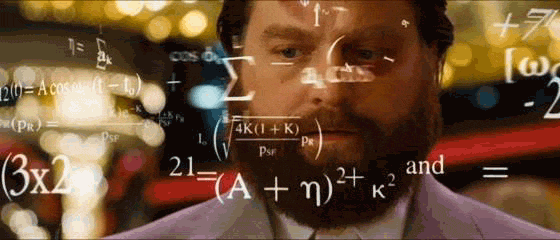

In [ ]:
sub_df = cudf.melt(test_df[["Id", "age", "domain1_var1", "domain1_var2", "domain2_var1", "domain2_var2"]], id_vars=["Id"], value_name="Predicted")
sub_df["Id"] = sub_df["Id"].astype("str") + "_" +  sub_df["variable"].astype("str")

sub_df = sub_df.drop("variable", axis=1).sort_values("Id")
assert sub_df.shape[0] == test_df.shape[0]*5
sub_df.head(10)

In [ ]:
sub_df.to_csv("submission_rapids_ensemble_with_baggingregressor.csv", index=False)

# <span style='color:Red'> Thanks for reading the notebook ❤ If you like, please Upvote 💕